In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import googleapiclient.discovery
import configparser
cfg = configparser.ConfigParser()
cfg.read("secrets.ini")
my_key=cfg.get("default", "gtrends_apikey")

In [14]:
SERVER = 'https://trends.googleapis.com'
VERSION = 'v1beta'
DISCOVERY_URL_SUFFIX = '/$discovery/rest?version=' + VERSION
DISCOVERY_URL = SERVER + DISCOVERY_URL_SUFFIX

In [53]:
service = googleapiclient.discovery.build('trends',VERSION,developerKey=my_key
                                         , discoveryServiceUrl=DISCOVERY_URL)

In [16]:
service.getGraph(terms='apple').execute()

{'lines': [{'term': 'apple',
   'points': [{'value': 20, 'date': '2004-01-01'},
    {'value': 18, 'date': '2004-02-01'},
    {'value': 17, 'date': '2004-03-01'},
    {'value': 18, 'date': '2004-04-01'},
    {'value': 17, 'date': '2004-05-01'},
    {'value': 19, 'date': '2004-06-01'},
    {'value': 20, 'date': '2004-07-01'},
    {'value': 20, 'date': '2004-08-01'},
    {'value': 22, 'date': '2004-09-01'},
    {'value': 24, 'date': '2004-10-01'},
    {'value': 22, 'date': '2004-11-01'},
    {'value': 23, 'date': '2004-12-01'},
    {'value': 28, 'date': '2005-01-01'},
    {'value': 24, 'date': '2005-02-01'},
    {'value': 23, 'date': '2005-03-01'},
    {'value': 22, 'date': '2005-04-01'},
    {'value': 23, 'date': '2005-05-01'},
    {'value': 23, 'date': '2005-06-01'},
    {'value': 22, 'date': '2005-07-01'},
    {'value': 24, 'date': '2005-08-01'},
    {'value': 29, 'date': '2005-09-01'},
    {'value': 30, 'date': '2005-10-01'},
    {'value': 27, 'date': '2005-11-01'},
    {'value': 29, 

In [26]:
df = pd.DataFrame(service.getGraph(terms='apple').execute())

In [27]:
df.head()

,lines
0,"{'term': 'apple', 'points': [{'value': 20, 'da..."


In [28]:
type(service.getGraph(terms='apple').execute())

dict

In [40]:
res=service.getGraph(terms='apple').execute()

In [43]:
df = pd.DataFrame(res['lines'][0]['points'])

In [44]:
df.head()

,value,date
0,20,2004-01-01
1,18,2004-02-01
2,17,2004-03-01
3,18,2004-04-01
4,17,2004-05-01


<AxesSubplot: >

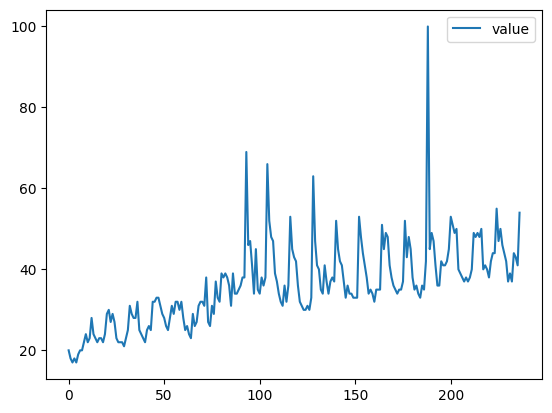

In [54]:
sns.lineplot(df)

In [55]:
df.columns

Index(['value', 'date'], dtype='object')

In [58]:
df['date'] = pd.to_datetime(df['date'])

<AxesSubplot: xlabel='date', ylabel='value'>

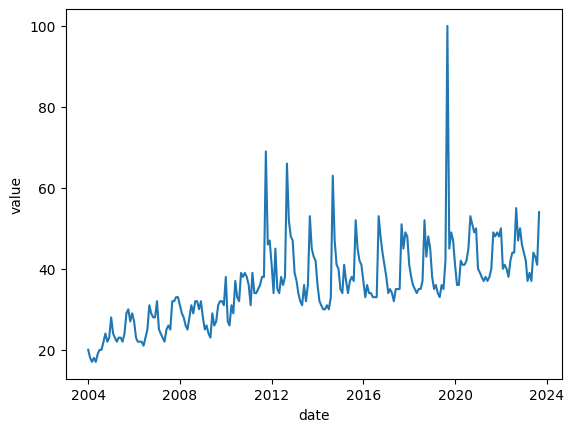

In [60]:
sns.lineplot(x=df['date'],y=df['value'])